In [411]:
import numpy as np
import matplotlib.pyplot as plt
import corner

In [497]:
w =0*abs(np.random.randn(500))+1
wnorm = w/np.sum(w)

In [512]:
var = np.random.random(500) + 1
inv_err = var**(-1/2)
r = inv_err/np.sum(inv_err*wnorm)

(0.0016739755722082518, 0.0024505483538383274, 0.00189, 0.00211)

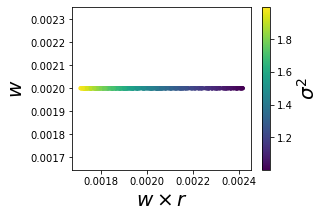

In [513]:
plt.figure(figsize=(4,3))
plt.scatter(wnorm*r, wnorm, c=var, s=10)
plt.xlabel(r'$w\times r$', fontsize=20)
plt.ylabel(r'$w$', fontsize=20)
plt.colorbar().set_label(label=r'$\sigma^2$',size=20,)
#plt.yscale('log')
#plt.xscale('log')
plt.axis('equal')

In [532]:
inv_var_mean_wr = np.average(1/var, weights=wnorm*r)

In [539]:
var_mean_w = np.average(var, weights=wnorm)

In [540]:
effective_inv_var = inv_var_mean_wr**2*var_mean_w

In [541]:
effective_var = 1/effective_inv_var

In [542]:
print(effective_inv_var)

0.7339375528539709


In [543]:
print(1/var_mean_w)

0.6781770461825923


In [544]:
mean = 0
x = np.linspace(-3,3,100)
y = []
for i in range(500):
    y.append(np.exp(-.5*(x-mean)**2/var[i])/((2*np.pi*var[i])**.5))

In [545]:
ymean = np.average(y, weights= wnorm, axis=0)

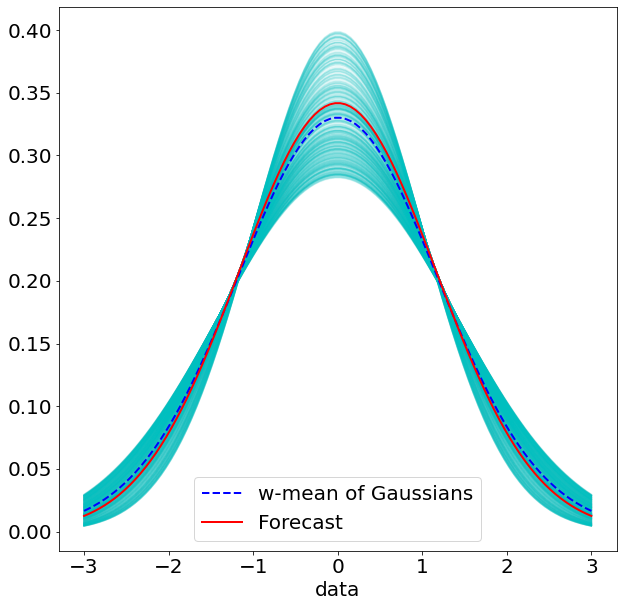

In [546]:

plt.figure(figsize=(10,10))
for i in range(500):
    plt.plot(x, y[i], 'c', alpha=.1)
plt.plot(x, ymean, '--b', linewidth=2, label='w-mean of Gaussians')
plt.plot(x, np.exp(-.5*(x-mean)**2/effective_var)/((2*np.pi*effective_var)**.5), '-r', linewidth=2, label='Forecast')
plt.xlabel('data', fontsize=20)
plt.legend(fontsize=20)
plt.tick_params(axis='both', which = 'major', labelsize= 20)